# Индивидуальное задание 3

>Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения круговой диаграммы.

Через 640 г 20%-ного раствора сульфата меди(II) пропускали электрический ток до тех пор, пока на аноде не выделилось 13,44 л (н. у.) газа. К образовавшемуся раствору добавили 65 г цинка. Определите массовую долю сульфата цинка в полученном растворе.  
Построить круговые диаграммы, отображающие соотношение масс веществ в растворе после электролиза и массовую долю сульфата цинка в конечном растворе.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
%matplotlib inline

Составим уравнение реакции электролиза раствора сульфата меди(II):
\begin{equation}
2CuSO_4 + 2H_2O \stackrel{эл. ток}{\longmapsto} 2Cu \downarrow + O_2 \uparrow + 2H_2SO_4 (1)
\end{equation}

Определим, является ли выделившийся газ продуктом только одной реакции:
\begin{equation}
v = \frac{m}{M},
\end{equation}
где $m$ - масса вещества, $M$ - молярная масса.
\begin{equation}
v = \frac{V}{V_m},
\end{equation}
где $V$ - объем газа при нормальных условиях, $V_m$ - молярный объем газа при тех же условиях, равный $22,4 \frac{л}{моль}$ по закону Авогадро.

In [2]:
m_CuSO4 = 640
ρ_CuSO4 = 0.2
M_CuSO4 = 64 + 32 + 4 * 16

v_CuSO4 = m_CuSO4 * ρ_CuSO4 / M_CuSO4
print(f"Количество вещества сульфата меди: {v_CuSO4} моль")

Количество вещества сульфата меди: 0.8 моль


In [3]:
V_O2 = 13.44
Vm = 22.4

v_O2 = V_O2 / Vm
print(f"Количество вещества газа: {v_O2}")

Количество вещества газа: 0.6


Но по уравнению реакции (1) должно выделиться $v(CuSO_4): 2 = 0,4$ моль кислорода. Значит, кислород выделяется ещё в результате реакции электролиза серной кислоты (воды):
\begin{equation}
2H_2O \stackrel{эл. ток}{\longmapsto} 2H_2 + O_2 \uparrow (2)
\end{equation}
Тогда $v(O_2)_{по 2} = v(O_2) - 0,4$ моль.

In [4]:
v_O2_2 = round(v_O2 - 0.4, 1)
print(f"v_O2_2 = {v_O2_2}")

v_O2_2 = 0.2


Определим массу раствора по результатам двух реакций электролиза:
\begin{equation}
m_{после эл-за} = m_{р-ра}(CuSO_4) - m(O_2) - m(H_2) - m(Cu)
\end{equation}

In [5]:
M_O2 = 2 * 16
m_O2 = v_O2 * M_O2
print(f"Масса O2: {m_O2} г")

M_H2 = 2 * 1
v_H2 = 2 * v_O2_2
m_H2 = v_H2 * M_H2
print(f"Масса H2: {m_H2} г")

M_Cu = 64
v_Cu = v_CuSO4
m_Cu = v_Cu * M_Cu
print(f"Масса Cu: {m_Cu} г")

M_H2SO4 = 2 * 1 + 32 + 4 * 16
v_H2SO4 = v_CuSO4
m_H2SO4 = v_H2SO4 * M_H2SO4
print(f"Масса H2SO4: {m_H2SO4} г")

m_after = m_CuSO4 - m_O2 - m_H2 - m_Cu
print(f"Масса раствора после электролиза: {m_after} г")

Масса O2: 19.2 г
Масса H2: 0.8 г
Масса Cu: 51.2 г
Масса H2SO4: 78.4 г
Масса раствора после электролиза: 568.8 г


Построим круговую диаграмму, отображающую соотношение масс веществ в растворе после электролиза.

(-1.109491562489598,
 1.1004519791661713,
 -1.1089130818802466,
 1.108697251153528)

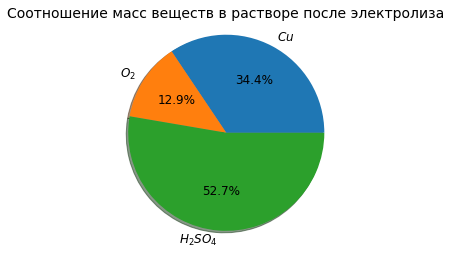

In [6]:
vals = [m_Cu, m_O2, m_H2SO4]
labels = [r"$Cu$", r"$O_2$", r"$H_2SO_4$"]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, 
       textprops={'fontsize': '12'})

ax.set_title("Соотношение масс веществ в растворе после электролиза",
            fontsize=14)

ax.axis("equal")

К полученном раствору добавили цинк:
\begin{equation}
Zn + H_2SO_4 = ZnSO_4 + H_2 \uparrow (3)
\end{equation}
Определим, какой из реагентов в избытке, а какой  — в недостатке:

In [7]:
v_H2SO4 = v_CuSO4
print(f"Количество вещества H2SO4: {v_H2SO4} моль")

m_Zn = 65
M_Zn = 65
v_Zn = m_Zn / M_Zn
print(f"Количество вещества Zn: {v_Zn} моль")

Количество вещества H2SO4: 0.8 моль
Количество вещества Zn: 1.0 моль


отсюда видим, что цинк в избытке. Значит, можем определить, сколько именно цинка прореагировало:
\begin{equation}
v(Zn)_{прореаг.} =v(H_2SO_4)
\end{equation}

In [8]:
v_Zn_react = v_H2SO4
m_Zn_react = v_Zn_react * M_Zn
print(f"Масса прореагировавшего Zn: {m_Zn_react} г")

Масса прореагировавшего Zn: 52.0 г


Найдём массу конечно раствора, после реакции с цинком:
\begin{equation}
m_{кон.} = m_{после эл-за} + m(Zn)_{прореаг.} - m(H_2)_{по 3}
\end{equation}

In [9]:
v_H2_3 = v_Zn_react
m_H2_3 = v_H2_3 * M_H2
m_end = round(m_after + m_Zn_react - m_H2_3, 1)
print(f"Масса конечного раствора: {m_end} г")

Масса конечного раствора: 619.2 г


откуда массовая доля cульфата цинка в конечном растворе:
\begin{equation}
w(ZnSO_4) = \frac{m_{вещ.}}{m_{р-ра}}
\end{equation}

In [10]:
v_ZnSO4 = v_Zn_react
M_ZnSO4 = 65 + 32 + 4 * 16
w_ZnSO4 = round(v_ZnSO4 * M_ZnSO4 / m_end * 100, 1)
print(f"Массовая доля сульфата цинка: {round(w_ZnSO4/100,3)} = {w_ZnSO4} %")

Массовая доля сульфата цинка: 0.208 = 20.8 %


Построим круговую диаграмму, отображающую массовую долю сульфата цинка $ZnSO_4$ в конечном растворе.

(-1.1088629419778218,
 1.2251919678277896,
 -1.1044122913329721,
 1.1594751361038946)

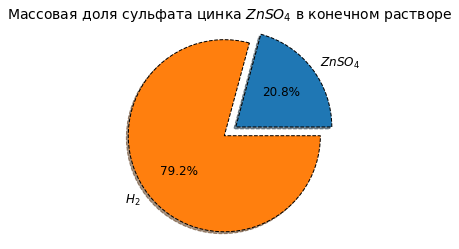

In [11]:
vals = [w_ZnSO4, 100 - w_ZnSO4]
labels = [r"$ZnSO_4$", r"$H_2$"]
explode = (0.15, 0)

fig, ax = plt.subplots()

ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, 
       explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, 
       rotatelabels=False, textprops={'fontsize': '12'})

ax.set_title(r"Массовая доля сульфата цинка $ZnSO_4$ в конечном растворе",
            fontsize=14)

ax.axis("equal")